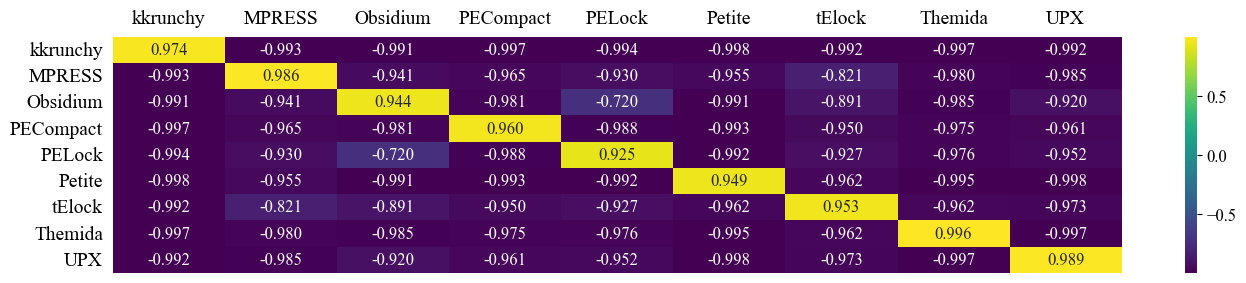

In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open('cosine_similarity_matrix.pkl', 'rb') as f:
    cosine_similarity = pickle.load(f)

# from matrix to pandas dataframe
df = pd.DataFrame(cosine_similarity)

# Extract packer names from the filenames
def extract_packer_name(filename):
    return filename.split('_')[0]

# Apply the function to the index and columns to get packer names
df.index = df.index.map(extract_packer_name)
df.columns = df.columns.map(extract_packer_name)

# Group by the packer names and calculate the mean similarity
mean_similarities = df.groupby(df.index).mean().groupby(lambda x: x, axis=1).mean()

# Display the mean similarities
heatmap_df = pd.DataFrame(mean_similarities, index=mean_similarities.index).transpose()

packer_map = {'upx': 'UPX', 'kkrunchy': 'kkrunchy', 'obsidium': 'Obsidium', 'pecompact':'PECompact', 'pelock': 'PELock', 'petite': 'Petite', 'themida-v2': 'Themida', 'mpress': 'MPRESS', 'telock': 'tElock'}

# Remap the index and column names with packer names
heatmap_df.index = heatmap_df.index.map(lambda x: packer_map[x])
heatmap_df.columns = heatmap_df.columns.map(lambda x: packer_map[x])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

# Creating the heatmap
plt.figure(figsize=(14, 3))
sns.heatmap(heatmap_df, annot=True, cmap="viridis", fmt=".3f")
# Adjust y-axis labels to the top
plt.gca().yaxis.tick_left()  # Move y-ticks to the left side
plt.gca().yaxis.set_label_position('left')  # Set y-axis label to the left (if you have one)
plt.gca().xaxis.tick_top()  # Move x-ticks to the top
plt.gca().xaxis.set_label_position('top')  # Set x-axis label to the top (if you have one)
# change font size of both lables and values inside cells
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Rotate the y-axis labels
plt.tight_layout()

plt.tick_params(left=False, top=False)

plt.savefig('', format='pdf')

plt.show()

